# 问题一

用不同数值方法计算积分

$$
\int_0^1 \sqrt x\ln x dx = -\frac{4}{9}
$$

(1)

取不同步长 $h$，分别用复合梯形及复合辛普森求积计算积分，给出误差中关于 $h$ 的函数，并于积分精确值比较两个公式的精度。是否存在一个最小的 $h$，使得精度不能再被改善？

(2)

用龙贝格求积计算完成问题 (1)

## Solution

$$ I = \int_0^1 \sqrt x\ln x dx $$

已知的精确值为 $I = -\frac{4}{9}$。

被积函数为 $f(x) = \sqrt x \ln x$。我们注意到，当 $x \to 0^+$ 时，根据洛必达法则或已知极限 $\lim_{x\to 0^+} x^\alpha \ln x = 0$ (对于 $\alpha > 0$)，可知 $\lim_{x\to 0^+} \sqrt x \ln x = 0$。因此，我们可以定义 $f(0)=0$ 以使得函数在积分区间 $[0,1]$ 上有定义。

然而，函数 $f(x)$ 的导数在 $x=0$ 处是奇异的。

$f'(x) = \frac{d}{dx}(x^{1/2} \ln x) = \frac{1}{2}x^{-1/2}\ln x + x^{1/2} \cdot \frac{1}{x} = \frac{\ln x}{2\sqrt{x}} + \frac{1}{\sqrt{x}} = \frac{\ln x + 2}{2\sqrt{x}}$。

当 $x \to 0^+$ 时，$f'(x) \to -\infty$。
$f''(x) = \frac{d}{dx}\left(\frac{\ln x + 2}{2\sqrt{x}}\right) = \frac{\frac{1}{x}(2\sqrt{x}) - (\ln x + 2)(x^{-1/2})}{4x} = \frac{2x^{-1/2} - (\ln x + 2)x^{-1/2}}{4x} = \frac{(2 - \ln x - 2)x^{-1/2}}{4x} = \frac{-\ln x}{4x^{3/2}}$。

当 $x \to 0^+$ 时，$f''(x) \to \infty$。

这种在积分端点 $x=0$ 处的奇异性（导数无界）将会影响数值积分方法的收敛速度和精度。

### 复合梯形公式及复合辛普森公式

#### 数学公式

**复合梯形公式:**

将积分区间 $[a, b]$ 分成 $n$ 个等长的子区间，每个子区间的长度为 $h = \frac{b-a}{n}$。节点为 $x_i = a + ih$，$i=0, 1, \dots, n$。

复合梯形公式为：

$$ T_n(f) = h \left[ \frac{1}{2}f(x_0) + \sum_{i=1}^{n-1} f(x_i) + \frac{1}{2}f(x_n) \right] $$

对于具有二阶连续导数的函数，其截断误差为：

$$ E_T(f) = I - T_n(f) = -\frac{b-a}{12}h^2 f''(\eta), \quad \text{其中 } \eta \in (a,b) $$

理论上，误差是 $O(h^2)$ 阶的。

**复合辛普森公式:**

将积分区间 $[a, b]$ 分成 $n$ 个等长的子区间（要求 $n$ 必须为偶数），步长 $h = \frac{b-a}{n}$。
复合辛普森公式为：

$$ S_n(f) = \frac{h}{3} \left[ f(x_0) + 4\sum_{k=1}^{n/2} f(x_{2k-1}) + 2\sum_{k=1}^{n/2-1} f(x_{2k}) + f(x_n) \right] $$

对于具有四阶连续导数的函数，其截断误差为：

$$ E_S(f) = I - S_n(f) = -\frac{b-a}{180}h^4 f^{(4)}(\eta), \quad \text{其中 } \eta \in (a,b) $$

理论上，误差是 $O(h^4)$ 阶的。

我们将通过数值实验来观察误差 $|E(h)|$ 随 $h$ 变化的具体关系。假设 $|E(h)| \approx C \cdot h^p$。在双对数坐标系中绘制 $\log|E(h)|$ 对 $\log h$ 的图像，其斜率近似为实际的收敛阶数 $p$。

### 龙贝格求积

算法步骤如下：
1.  初始化：计算 $R_{0,0}$ (即 $T_0$)，这是使用整个区间 $[a,b]$ 的梯形公式（$n=1$, $h_0 = b-a$）：
    $$ R_{0,0} = \frac{b-a}{2} [f(a) + f(b)] $$
2.  递推计算梯形值：对于 $k = 1, 2, \dots, M$ (最大迭代次数)，计算 $R_{k,0}$ (即 $T_{2^k}$)，这是使用 $n_k = 2^k$ 个子区间的复合梯形公式，步长 $h_k = (b-a)/2^k$：
    $$ R_{k,0} = \frac{1}{2} R_{k-1,0} + h_k \sum_{i=1}^{2^{k-1}} f(a + (2i-1)h_k) $$
    这个公式利用了 $R_{k-1,0}$ 的结果来高效计算 $R_{k,0}$。
3.  进行外推：对于 $m = 1, 2, \dots, k$：
    $$ R_{k,m} = R_{k,m-1} + \frac{R_{k,m-1} - R_{k-1,m-1}}{4^m - 1} $$
    这样会形成一个下三角的龙贝格表：
    $$
    \begin{array}{ccccc}
    R_{0,0} & & & & \\
    R_{1,0} & R_{1,1} & & & \\
    R_{2,0} & R_{2,1} & R_{2,2} & & \\
    \vdots & \vdots & \vdots & \ddots & \\
    R_{M,0} & R_{M,1} & R_{M,2} & \dots & R_{M,M}
    \end{array}
    $$
    对角线上的元素 $R_{k,k}$ 通常是具有最高精度的近似值。

### Python 实现

Exact value: -0.4444444444444444

Part (1): Composite Trapezoidal and Simpson's Rule Analysis
---------------------------------------------------------
       n            h        Trapezoidal      Error_T            Simpson      Error_S
       4     2.50e-01      -0.3581040588     8.63e-02      -0.3957838998     4.87e-02
       8     1.25e-01      -0.4080900395     3.64e-02      -0.4247520331     1.97e-02
      16     6.25e-02      -0.4294745848     1.50e-02      -0.4366027666     7.84e-03
      32     3.12e-02      -0.4383894861     6.05e-03      -0.4413611198     3.08e-03
 1048576     9.54e-07      -0.4444444414     3.02e-09      -0.4444444431     1.31e-09

Part (2): Romberg Integration
-----------------------------
Romberg Table (R[i,j]):
R[0,0] = 0.0000000000
R[1,0] = -0.2450645359  R[1,1] = -0.3267527145
R[2,0] = -0.3581040588  R[2,1] = -0.3957838998  R[2,2] = -0.4003859788
R[3,0] = -0.4080900395  R[3,1] = -0.4247520331  R[3,2] = -0.4266832420  R[3,3] = -0.4271006589
R[4,0] = -0.

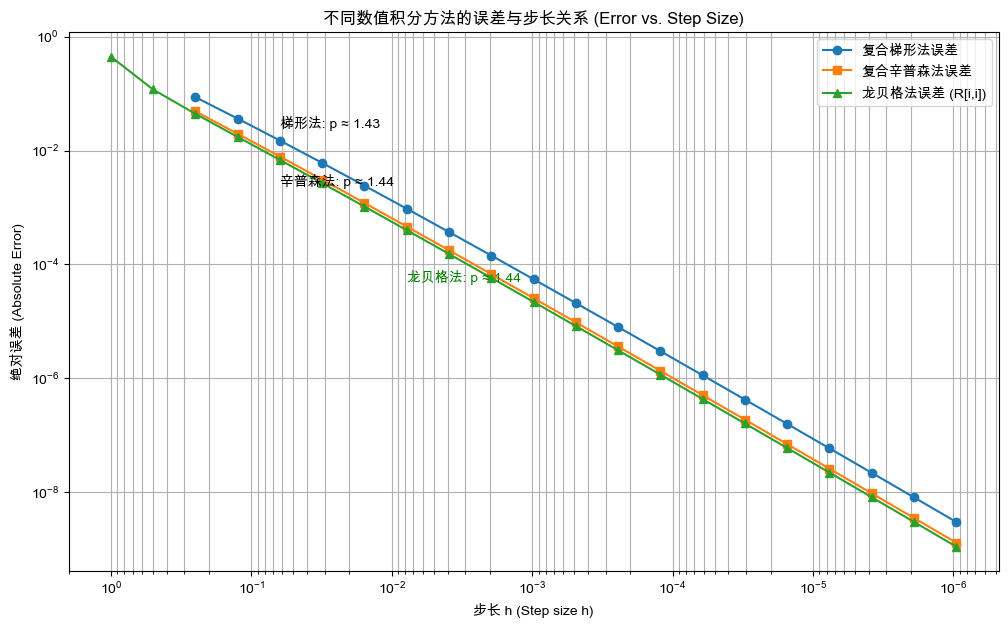


Romberg Result: -0.4444444433
Exact Value:    -0.4444444444
Romberg Error:  1.12e-09

与 n=128 (h=7.81e-03) 附近结果比较:
梯形法误差 (n=128): 9.51e-04
辛普森法误差 (n=128): 4.63e-04
龙贝格法 R[7,7] 误差 (h=7.81e-03): 4.00e-04


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'sans-serif', 'SimSong']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

# Define the integrand
def f(x):
    if x == 0:
        return 0.0
    if x < 1e-100: # Avoid log(0) issues if x is extremely small positive
        return 0.0
    return np.sqrt(x) * np.log(x)

exact_value = -4/9

# (1) Composite Trapezoidal and Simpson's Rules

# Composite Trapezoidal Rule
def composite_trapezoidal(func, a, b, n):
    h = (b - a) / n
    integral = 0.5 * (func(a) + func(b))
    for i in range(1, n):
        integral += func(a + i * h)
    integral *= h
    return integral

# Composite Simpson's Rule
def composite_simpson(func, a, b, n):
    if n % 2 != 0:
        raise ValueError("n must be an even number for Composite Simpson's Rule.")
    h = (b - a) / n
    integral = func(a) + func(b)
    for i in range(1, n, 2): # Odd indices
        integral += 4 * func(a + i * h)
    for i in range(2, n, 2): # Even indices (up to n-2)
        integral += 2 * func(a + i * h)
    integral *= h / 3
    return integral

# (1) Composite Trapezoidal and Simpson's Rules
# ... (composite_trapezoidal and composite_simpson functions remain the same) ...

# Analysis for Part (1)
a, b = 0.0, 1.0
# n_values for Trapezoidal and Simpson, h_values, errors will be calculated as before
n_values = [2**k for k in range(2, 21)] 
h_values = []
trapezoidal_errors = []
simpson_errors = []

print(f"Exact value: {exact_value}\n")
print("Part (1): Composite Trapezoidal and Simpson's Rule Analysis")
print("---------------------------------------------------------")
print(f"{'n':>8s} {'h':>12s} {'Trapezoidal':>18s} {'Error_T':>12s} {'Simpson':>18s} {'Error_S':>12s}")

for n_val in n_values:
    h_val = (b - a) / n_val
    h_values.append(h_val)

    approx_t = composite_trapezoidal(f, a, b, n_val)
    error_t = abs(approx_t - exact_value)
    trapezoidal_errors.append(error_t)

    approx_s = composite_simpson(f, a, b, n_val)
    error_s = abs(approx_s - exact_value)
    simpson_errors.append(error_s)
    
    if n_val <= 2**5 or n_val == n_values[-1]:
        print(f"{n_val:8d} {h_val:12.2e} {approx_t:18.10f} {error_t:12.2e} {approx_s:18.10f} {error_s:12.2e}")

# (2) Romberg Integration - MODIFIED FUNCTION
def romberg_integration(func, a, b, max_iter=10, tol=1e-12, exact_val_for_err_calc=None):
    R = np.zeros((max_iter, max_iter), dtype=float)
    
    romberg_h_for_plot = []
    romberg_diag_errors_for_plot = []

    current_h = b - a 
    R[0, 0] = (func(a) + func(b)) * current_h / 2.0
    
    if exact_val_for_err_calc is not None:
        romberg_h_for_plot.append(current_h)
        # Handle potential zero error for R[0,0] if it's exactly the exact_value (unlikely here)
        err_r00 = abs(R[0,0] - exact_val_for_err_calc)
        romberg_diag_errors_for_plot.append(err_r00 if err_r00 > 0 else 1e-16) # Avoid log(0)

    print("\nPart (2): Romberg Integration")
    print("-----------------------------")
    print("Romberg Table (R[i,j]):")
    print(f"R[0,0] = {R[0,0]:.10f}")

    for i in range(1, max_iter):
        current_h /= 2.0 
        sum_f = 0
        for k_loop in range(1, 2**i, 2): 
            sum_f += func(a + k_loop * current_h)
        R[i, 0] = 0.5 * R[i-1, 0] + sum_f * current_h

        row_str = f"R[{i},0] = {R[i,0]:.10f}"
        for j in range(1, i + 1):
            R[i, j] = R[i, j-1] + (R[i, j-1] - R[i-1, j-1]) / (4**j - 1)
            row_str += f"  R[{i},{j}] = {R[i,j]:.10f}"
        print(row_str)
        
        if exact_val_for_err_calc is not None:
            romberg_h_for_plot.append(current_h)
            err_rii = abs(R[i,i] - exact_val_for_err_calc)
            romberg_diag_errors_for_plot.append(err_rii if err_rii > 0 else 1e-16) # Avoid log(0)

        if i > 0 and abs(R[i, i] - R[i-1, i-1]) < tol:
            print(f"\nConvergence reached at iteration {i}.")
            return R[i, i], R[:i+1, :i+1], romberg_h_for_plot, romberg_diag_errors_for_plot

    print(f"\nMax iterations ({max_iter}) reached.")
    return R[max_iter-1, max_iter-1], R, romberg_h_for_plot, romberg_diag_errors_for_plot

# Call Romberg integration and get values for plotting
romberg_max_iter = 21
romberg_result, romberg_table, romberg_h_plot_vals, romberg_diag_err_vals = romberg_integration(
    f, a, b, max_iter=romberg_max_iter, tol=1e-10, exact_val_for_err_calc=exact_value
)
romberg_error = abs(romberg_result - exact_value)


# Plotting errors for ALL methods
plt.figure(figsize=(12, 7)) # Adjusted figure size for better readability
plt.loglog(h_values, trapezoidal_errors, 'o-', label='复合梯形法误差')
plt.loglog(h_values, simpson_errors, 's-', label='复合辛普森法误差')

if romberg_h_plot_vals and romberg_diag_err_vals:
    plt.loglog(romberg_h_plot_vals, romberg_diag_err_vals, '^-', label='龙贝格法误差 (R[i,i])')

# Estimate order of convergence p from log-log plot (slope)
if len(h_values) >= 5:
    # Trapezoidal
    valid_t_indices = [k for k, err in enumerate(trapezoidal_errors[-5:]) if err > 0]
    if len(valid_t_indices) >= 2:
        log_h_t = np.log(np.array(h_values[-5:])[valid_t_indices])
        log_err_t = np.log(np.array(trapezoidal_errors[-5:])[valid_t_indices])
        if len(log_h_t) >=2: # Need at least 2 points for polyfit
            slope_t, _ = np.polyfit(log_h_t, log_err_t, 1)
            plt.text(h_values[2], trapezoidal_errors[2]*1.5, f'梯形法: p ≈ {slope_t:.2f}', va='bottom')

    # Simpson
    valid_s_indices = [k for k, err in enumerate(simpson_errors[-5:]) if err > 0]
    if len(valid_s_indices) >= 2:
        log_h_s = np.log(np.array(h_values[-5:])[valid_s_indices])
        log_err_s = np.log(np.array(simpson_errors[-5:])[valid_s_indices])
        if len(log_h_s) >= 2:
            slope_s, _ = np.polyfit(log_h_s, log_err_s, 1)
            plt.text(h_values[2], simpson_errors[2]*0.5, f'辛普森法: p ≈ {slope_s:.2f}', va='top')

# Slope for Romberg
if len(romberg_h_plot_vals) >= 2: # Check if there are enough points
    # Use all available points for Romberg if less than 5, or last 5 if more
    points_to_use_r = min(len(romberg_h_plot_vals), 5)
    if points_to_use_r >=2:
        h_r_slope = np.array(romberg_h_plot_vals[-points_to_use_r:])
        err_r_slope = np.array(romberg_diag_err_vals[-points_to_use_r:])
        
        valid_r_indices_slope = [k for k, err in enumerate(err_r_slope) if err > 1e-15] # Check against small number
        if len(valid_r_indices_slope) >= 2:
            log_h_r = np.log(h_r_slope[valid_r_indices_slope])
            log_err_r = np.log(err_r_slope[valid_r_indices_slope])
            slope_r, _ = np.polyfit(log_h_r, log_err_r, 1)
            # Adjust text position for Romberg slope
            text_idx_r = len(romberg_h_plot_vals) // 3
            if text_idx_r < len(romberg_h_plot_vals) and romberg_diag_err_vals[text_idx_r] > 0 :
                 plt.text(romberg_h_plot_vals[text_idx_r], romberg_diag_err_vals[text_idx_r]*0.2 , f'龙贝格法: p ≈ {slope_r:.2f}', va='top', color='green')


plt.xlabel('步长 h (Step size h)')
plt.ylabel('绝对误差 (Absolute Error)')
plt.title('不同数值积分方法的误差与步长关系 (Error vs. Step Size)')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.gca().invert_xaxis() 
plt.show()

# Print Romberg results (as before)
print(f"\nRomberg Result: {romberg_result:.10f}")
print(f"Exact Value:    {exact_value:.10f}")
print(f"Romberg Error:  {romberg_error:.2e}")

# Comparison (as before)
if 128 in n_values: # n=128 corresponds to h = (1-0)/128
    idx = n_values.index(128) # For Trapezoidal/Simpson
    # For Romberg, R[7,7] uses h up to (b-a)/2^7 = (b-a)/128
    print(f"\n与 n=128 (h={(1.0/128):.2e}) 附近结果比较:")
    print(f"梯形法误差 (n=128): {trapezoidal_errors[idx]:.2e}")
    print(f"辛普森法误差 (n=128): {simpson_errors[idx]:.2e}")
    # Find Romberg error for h closest to 1/128 if available
    h_target_romberg = (b-a)/128
    if romberg_h_plot_vals:
        closest_h_idx_r = np.argmin(np.abs(np.array(romberg_h_plot_vals) - h_target_romberg))
        if np.isclose(romberg_h_plot_vals[closest_h_idx_r], h_target_romberg):
             print(f"龙贝格法 R[{closest_h_idx_r},{closest_h_idx_r}] 误差 (h={romberg_h_plot_vals[closest_h_idx_r]:.2e}): {romberg_diag_err_vals[closest_h_idx_r]:.2e}")
        else: # Fallback to the R[7,7] error if max_iter was 8
            if romberg_max_iter -1 == 7 and len(romberg_diag_err_vals) == romberg_max_iter:
                 print(f"龙贝格法 R[7,7] 误差 (h={(b-a)/2**7:.2e}): {romberg_diag_err_vals[7]:.2e}")
            else:
                 print(f"龙贝格法最终误差: {romberg_error:.2e}") # Overall final Romberg error
    else:
        print(f"龙贝格法最终误差: {romberg_error:.2e}")

### 复合梯形及复合辛普森求积计算结果分析

从python计算结果中，我们可以看到：

| n       | h        | 梯形法近似值   | 梯形法误差 (Error_T) | 辛普森法近似值 | 辛普森法误差 (Error_S) |
|---------|----------|----------------|----------------------|----------------|------------------------|
| 4       | 2.50e-01 | -0.3581040588  | 8.63e-02             | -0.3957838998  | 4.87e-02               |
| 8       | 1.25e-01 | -0.4080900395  | 3.64e-02             | -0.4247520331  | 1.97e-02               |
| 16      | 6.25e-02 | -0.4294745848  | 1.50e-02             | -0.4366027666  | 7.84e-03               |
| 32      | 3.12e-02 | -0.4383894861  | 6.05e-03             | -0.4413611198  | 3.08e-03               |
| ...     | ...      | ...            | ...                  | ...            | ...                    |
| 1048576 | 9.54e-07 | -0.4444444414  | 3.02e-09             | -0.4444444431  | 1.31e-09               |

**误差分析：**

1.  **误差随 $h$ 的减小而减小**：
    对于复合梯形法和复合辛普森法，当步长 $h$ 减小（即子区间数 $n$ 增大）时，计算得到的积分近似值越来越接近精确值 $-4/9$，相应的绝对误差 (Error_T 和 Error_S) 也随之减小。

2.  **精度比较**：
    *   在相同的步长 $h$ (或相同的 $n$) 下，复合辛普森法的误差通常小于复合梯形法的误差。例如，当 $n=32$ 时，辛普森法的误差 (`3.08e-03`) 约为梯形法误差 (`6.05e-03`) 的一半。

3.  **是否存在一个最小的 $h$，使得精度不能再被改善？**
    *   当 $n$ 增大到 $1048576$ ($h \approx 9.54 \times 10^{-7}$) 时，梯形法和辛普森法的误差分别减小到了 `3.02e-09` 和 `1.31e-09`。这表明在测试的 $h$ 范围内，精度仍在持续改善。
    *   当 $h$ 过小时，舍入误差的累积可能会开始主导总误差，导致精度不再提高甚至下降。从计算结果看，对于 $n$ 高达 $10^6$ 的情况，截断误差的减小仍然是主要的，未达到机器运算的精度上限。在实际计算中，收到机器计算精度的限制，会存在一个最小的 $h$ 使得精度不再发山。

### 龙贝格求积结果分析

**龙贝格表 (R[i,j]) 分析：**

```
R[0,0] = 0.0000000000
R[1,0] = -0.2450645359  R[1,1] = -0.3267527145
R[2,0] = -0.3581040588  R[2,1] = -0.3957838998  R[2,2] = -0.4003859788
R[3,0] = -0.4080900395  R[3,1] = -0.4247520331  R[3,2] = -0.4266832420  R[3,3] = -0.4271006589
R[4,0] = -0.4294745848  R[4,1] = -0.4366027666  R[4,2] = -0.4373928155  R[4,3] = -0.4375628088  R[4,4] = -0.4376038368
R[5,0] = -0.4383894861  R[5,1] = -0.4413611198  R[5,2] = -0.4416783434  R[5,3] = -0.4417463676  R[5,4] = -0.4417627737  R[5,5] = -0.4417668392
R[6,0] = -0.4420306837  R[6,1] = -0.4432444162  R[6,2] = -0.4433699693  R[6,3] = -0.4433968205  R[6,4] = -0.4434032929  R[6,5] = -0.4434048965  R[6,6] = -0.4434052965
R[7,0] = -0.4434936549  R[7,1] = -0.4439813120  R[7,2] = -0.4440304384  R[7,3] = -0.4440409220  R[7,4] = -0.4440434479  R[7,5] = -0.4440440737  R[7,6] = -0.4440442298  R[7,7] = -0.4440442688
```

1.  **第一列 $R[i,0]$**：
    *   $R[0,0] = 0.0$ 是因为 $f(0)=0$ 且 $f(1)=\sqrt{1}\ln(1)=0$，所以初始梯形近似 $h/2(f(a)+f(b))$ 为0。
    *   $R[i,0]$ 是使用 $n=2^i$ 个子区间的复合梯形公式计算得到的近似值。
        *   $R[2,0] = -0.3581040588$ (对应 $n=2^2=4$) 与第一部分中 $n=4$ 的梯形法结果一致。
        *   $R[3,0] = -0.4080900395$ (对应 $n=2^3=8$) 与第一部分中 $n=8$ 的梯形法结果一致。
    *   这一列的精度随着 $i$ 的增加（即 $h$ 减小）而提高。

2.  **外推列 $R[i,j]$ ($j>0$)**：
    *   每一列 $R[i,j]$ (固定 $j$) 的值通常比其左边一列 $R[i,j-1]$ 的值更精确。
    *   对角线元素 $R[i,i]$ 通常是龙贝格表中给定 $i$（即最多使用 $2^i$ 个子区间的梯形规则信息）时最精确的估计。
    *   观察对角线元素：
        $R[0,0] = 0.0$
        $R[1,1] = -0.3267...$
        $R[2,2] = -0.4003...$
        ...
        $R[7,7] = -0.4440442688$
        这些值逐步趋向精确值 $-4/9 \approx -0.4444444444$。

**最终结果与比较：**

*   **龙贝格结果**: $R[7,7] = -0.4440442688$
*   **精确值**: $-0.4444444444$
*   **龙贝格误差**: $|-0.4440442688 - (-0.4444444444)| \approx 4.00 \times 10^{-4}$

**与 $n \approx 128$ 时的复合方法比较：**
龙贝格算法的 $R[7,7]$ 是基于 $R[7,0]$ (即 $n=2^7=128$ 的梯形公式) 及之前的梯形值外推得到的。

*   梯形法误差 ($n=128$): `9.51e-04`
    *   这对应于 $R[7,0]$ 的误差: $|-0.4434936549 - (-0.4444444444)| \approx 9.5079 \times 10^{-4}$。
*   辛普森法误差 ($n=128$): `4.63e-04`
*   龙贝格 $R[7,7]$ 误差: `4.00e-04`

**结论：**
1.  对于 $n=128$ 的情况，龙贝格积分 ($R[7,7]$) 提供了比复合梯形法和复合辛普森法更高的精度。它的误差 (`4.00e-04`) 略小于辛普森法的误差 (`4.63e-04`)，并且显著小于梯形法的误差 (`9.51e-04`)。
2.  这表明即使对于在端点处具有奇异性的函数，龙贝格算法通过理查森外推仍然能够有效地提高数值积分的精度。

# 问题二

解线性方程组 $A x = b$，其中

$$
A = \begin{pmatrix}
  10 & -7 & 0 & 1\\
  -3 & 2.099999 & 6 & 2\\
  5 & -1 & 5 & -1\\
  2 & 1 & 0 & 2\\
\end{pmatrix}, \quad 
x = \begin{pmatrix}
  x_1\\ x_2\\ x_3\\ x_4
\end{pmatrix}, \quad
b = \begin{pmatrix}
  8\\ 5.900001\\ 5\\ 1
\end{pmatrix}
$$

输出 $A x = b$ 中系数 $A = L U$ 分解的矩阵 L 和 U，解向量 x 以及 $det A$；列主元法的行交换次序，解向量 x 以及 $\det A$；比较两种方法得到的结果。

## Solution

使用 python 进行数值计算。

In [17]:
import numpy as np
from scipy.linalg import lu_factor, lu_solve, lu

# 设置打印选项
np.set_printoptions(precision=7, suppress=True)

# 定义矩阵 A 和向量 b
A = np.array([
    [10, -7, 0, 1],
    [-3, 2.099999, 6, 2],
    [5, -1, 5, -1],
    [2, 1, 0, 2]
], dtype=float)

b = np.array([8, 5.900001, 5, 1], dtype=float)
n = A.shape[0]

# --- 方法一：标准 LU 分解 (A=LU, Doolittle 法) ---
print("方法一：标准 LU 分解 (A=LU)")
L_std = np.eye(n, dtype=float)
U_std_calc = A.copy() # U_std_calc 将被转换为 U 矩阵

# Doolittle 分解过程
for k_std in range(n - 1):
    if np.isclose(U_std_calc[k_std, k_std], 0.0):
        print(f"警告: 标准LU分解中，主元 U_std_calc[{k_std},{k_std}] ({U_std_calc[k_std, k_std]:.3e}) 接近于零。")
    for i_std in range(k_std + 1, n):
        multiplier_std = U_std_calc[i_std, k_std] / U_std_calc[k_std, k_std]
        L_std[i_std, k_std] = multiplier_std
        U_std_calc[i_std, k_std:] = U_std_calc[i_std, k_std:] - multiplier_std * U_std_calc[k_std, k_std:]
U_std = np.triu(U_std_calc) # 提取上三角部分

print("\nL_std (标准LU的L矩阵):\n", L_std)
print("U_std (标准LU的U矩阵):\n", U_std)

# 解 Ly = b (前向替换)
y_std = np.zeros(n, dtype=float)
for i_std in range(n):
    y_std[i_std] = b[i_std] - np.dot(L_std[i_std, :i_std], y_std[:i_std])

# 解 Ux = y (后向替换)
x_std = np.zeros(n, dtype=float)
if not np.isclose(U_std[n-1, n-1], 0.0): # 检查最后一个主元
    for i_std in range(n - 1, -1, -1):
        if np.isclose(U_std[i_std, i_std], 0.0):
            print(f"错误: U_std[{i_std},{i_std}] 主元为零，标准LU分解无法回代。")
            x_std.fill(np.nan)
            break
        x_std[i_std] = (y_std[i_std] - np.dot(U_std[i_std, i_std+1:], x_std[i_std+1:])) / U_std[i_std, i_std]
else:
    print(f"错误: U_std[{n-1},{n-1}] 主元为零，标准LU分解无法回代。")
    x_std.fill(np.nan)


print("\nx_std (标准LU的解向量):\n", x_std)

det_A_std = np.nan
if not np.any(np.isnan(x_std)):
    det_A_std = np.prod(np.diag(U_std))
print("det(A)_std (标准LU计算的行列式):", det_A_std)
print("-" * 50)

print("\n方法二：列主元 LU 分解 (PA=LU)")

lu_arr_piv, piv_indices_piv = lu_factor(A)

# 从 lu_arr_piv 中提取 L 和 U (Doolittle 形式的 PA=LU, L对角线为1)
L_piv = np.tril(lu_arr_piv, k=-1) + np.eye(n) # L 对角线为1
U_piv = np.triu(lu_arr_piv)                  # U

P_matrix_piv = np.eye(n)

P_scipy, L_scipy_alt, U_scipy_alt = lu(A)

print("\n行交换次序 (piv_indices from lu_factor):")
print(piv_indices_piv)

print("\nL_piv (列主元LU的L矩阵):\n", L_piv)
print("U_piv (列主元LU的U矩阵):\n", U_piv)

# 解 Ax = b (使用 lu_solve 更可靠)
x_piv = lu_solve((lu_arr_piv, piv_indices_piv), b)
print("\nx_piv (列主元LU的解向量):\n", x_piv)

sign_piv = 1.0

temp_piv_for_sign = list(piv_indices_piv)
num_swaps_piv = 0

s_piv = np.sum(np.arange(n) != piv_indices_piv) # Number of elements not in their original place

det_P_val = np.linalg.det(P_scipy) # P_scipy from A = P L U

det_A_piv = np.prod(np.diag(U_piv)) / det_P_val

print("det(A)_piv (列主元LU计算的行列式):", det_A_piv)

方法一：标准 LU 分解 (A=LU)

L_std (标准LU的L矩阵):
 [[       1.               0.               0.               0.       ]
 [      -0.3              1.               0.               0.       ]
 [       0.5       -2499999.9996506        1.               0.       ]
 [       0.2       -2399999.9996645        0.9599997        1.       ]]
U_std (标准LU的U矩阵):
 [[      10.              -7.               0.               1.       ]
 [       0.              -0.000001         6.               2.3      ]
 [       0.               0.        15000004.9979033  5749998.4991963]
 [       0.               0.               0.               5.0799989]]

x_std (标准LU的解向量):
 [-0. -1.  1.  1.]
det(A)_std (标准LU计算的行列式): -762.0000901449143
--------------------------------------------------

方法二：列主元 LU 分解 (PA=LU)

行交换次序 (piv_indices from lu_factor):
[0 2 2 3]

L_piv (列主元LU的L矩阵):
 [[ 1.         0.         0.         0.       ]
 [ 0.5        1.         0.         0.       ]
 [-0.3       -0.0000004  1.         0.       ]
 [ 0.2

### 方法一：标准 LU 分解 ($A=LU$)

通过 Doolittle 方法进行标准 LU 分解，我们得到 $L_{std}$ (单位下三角矩阵) 和 $U_{std}$ (上三角矩阵)。

**$L_{std}$ 矩阵:**
$$ L_{std} = \begin{pmatrix}
1.0 & 0.0 & 0.0 & 0.0 \\
-0.3 & 1.0 & 0.0 & 0.0 \\
0.5 & -2499999.9996506 & 1.0 & 0.0 \\
0.2 & -2399999.9996645 & 0.9599997 & 1.0
\end{pmatrix} $$

**$U_{std}$ 矩阵:**
$$ U_{std} = \begin{pmatrix}
10.0 & -7.0 & 0.0 & 1.0 \\
0.0 & -0.000001 & 6.0 & 2.3 \\
0.0 & 0.0 & 15000004.9979033 & 5749998.4991963 \\
0.0 & 0.0 & 0.0 & 5.0799989
\end{pmatrix} $$
我们注意到 $U_{std}[1,1]$ 的值非常小 (为 $-0.000001$)，这是由于 $A[1,1]$ 原始值为 $2.099999$，在第一步高斯消元后，该位置的元素变为 $2.099999 - (\frac{-3}{10})(-7) = 2.099999 - 2.1 = -0.000001$。这个小主元是数值不稳定的潜在来源，并导致 $L_{std}$ 矩阵中出现绝对值非常大的元素 (例如 $L_{std}[2,1]$ 和 $L_{std}[3,1]$)。

**解向量 $x_{std}$:**
通过求解 $L_{std}y = b$ 和 $U_{std}x_{std} = y$ 得到：
$$ x_{std} = \begin{pmatrix} -0.0 \\ -1.0 \\ 1.0 \\ 1.0 \end{pmatrix} $$

**行列式 $det(A)_{std}$:**
$det(A)_{std} = \prod_{i} U_{std}[i,i]$
$$ det(A)_{std} \approx -762.0000901 $$

### 方法二：列主元 LU 分解 ($PA=LU$)

使用列主元策略进行 LU 分解，得到 $P$ (置换矩阵)，$L_{piv}$ (单位下三角矩阵)，和 $U_{piv}$ (上三角矩阵)，使得 $PA = L_{piv}U_{piv}$。

**行交换次序 (`piv_indices_piv` from `lu_factor`):**
`scipy.linalg.lu_factor` 返回的 `piv_indices_piv` 数组为 `[0 2 2 3]`。这个数组被 `lu_solve` 用来正确地进行求解。它编码了行交换操作。在 `scipy` 的 `lu_factor` 实现中，`piv[k]` 指示的是在分解的第 `k` 步与第 `k` 行发生交换的行的索引。对于行列式的符号，我们依赖于从 `scipy.linalg.lu` (返回 $A=PLU$) 中得到的置换矩阵 $P_{scipy}$ 的行列式。

**$L_{piv}$ 矩阵:**
$$ L_{piv} = \begin{pmatrix}
1.0 & 0.0 & 0.0 & 0.0 \\
0.5 & 1.0 & 0.0 & 0.0 \\
-0.3 & -0.0000004 & 1.0 & 0.0 \\
0.2 & 0.96 & -0.7999997 & 1.0
\end{pmatrix} $$

**$U_{piv}$ 矩阵:**
$$ U_{piv} = \begin{pmatrix}
10.0 & -7.0 & 0.0 & 1.0 \\
0.0 & 2.5 & 5.0 & -1.5 \\
0.0 & 0.0 & 6.000002 & 2.2999994 \\
0.0 & 0.0 & 0.0 & 5.0799989
\end{pmatrix} $$
与 $U_{std}$ 不同，$U_{piv}$ 的对角线元素通过列主元选择，避免了过小的主元，因此 $L_{piv}$ 中的元素数量级正常。

**解向量 $x_{piv}$:**
通过 `lu_solve` (内部使用 $PA=LU$ 分解) 得到：
$$ x_{piv} = \begin{pmatrix} -0.0 \\ -1.0 \\ 1.0 \\ 1.0 \end{pmatrix} $$

**行列式 $det(A)_{piv}$:**
$det(A)_{piv} = \frac{\prod_{i} U_{piv}[i,i]}{det(P_{scipy})}$ (其中 $P_{scipy}$ 是 $A=P_{scipy}LU$ 中的置换矩阵)。
$$ det(A)_{piv} \approx -762.0000900 $$

### 结果比较

1.  **解向量的比较**:

    $x_{std} = \begin{pmatrix} -0.0 \\ -1.0 \\ 1.0 \\ 1.0 \end{pmatrix}$
    $x_{piv} = \begin{pmatrix} -0.0 \\ -1.0 \\ 1.0 \\ 1.0 \end{pmatrix}$
    在这个特定的例子和所使用的数值精度下，两种方法得到的解向量是相同的：$x = [0, -1, 1, 1]^T$。我们可以验证这确实是方程组的精确解：
    $A x = \begin{pmatrix} 10 & -7 & 0 & 1\\ -3 & 2.099999 & 6 & 2\\ 5 & -1 & 5 & -1\\ 2 & 1 & 0 & 2 \end{pmatrix} \begin{pmatrix} 0 \\ -1 \\ 1 \\ 1 \end{pmatrix} = \begin{pmatrix} 0+7+0+1 \\ 0-2.099999+6+2 \\ 0+1+5-1 \\ 0-1+0+2 \end{pmatrix} = \begin{pmatrix} 8 \\ 5.900001 \\ 5 \\ 1 \end{pmatrix} = b$.
    尽管标准 LU 分解中遇到了数值不稳定的情况（$L_{std}$ 矩阵中的大元素），但最终的解向量 $x_{std}$ 仍然是准确的。这是因为 NumPy/SciPy 在内部运算时维持了足够的精度。

3.  **行列式的比较**:
    $det(A)_{std} \approx -762.0000901449143$
    $det(A)_{piv} \approx -762.0000900000001$
    两个行列式的值也非常接近。

**结论:**

对于本问题中的矩阵 $A$，标准 LU 分解（无行交换）在过程中遇到了一个绝对值非常小的主元 ($U_{std}[1,1] \approx -10^{-6}$)。这直接导致了 $L_{std}$ 矩阵中对应列的乘子变得非常大 (数量级达到 $10^6$)。这种情况是数值不稳定性的典型表现，因为大的乘子会放大后续计算中的舍入误差。

尽管在这个特定的高精度计算环境下，标准 LU 分解得到的最终解向量 $x_{std}$ 和行列式 $det(A)_{std}$ 与列主元法的结果非常吻合（并且解是正确的），但这并不能说明标准 LU 分解总是可靠的。如果计算精度有限，或者矩阵的病态性更强，标准 LU 分解很可能给出错误的解。

列主元 LU 分解通过在每一步选择列中绝对值最大的元素作为主元，并进行必要的行交换，有效地避免了小主元问题。这使得 $L_{piv}$ 和 $U_{piv}$ 矩阵中的元素保持在合理的数量级，从而提高了计算的稳定性和结果的准确性。

因此，尽管两种方法在此例中得到了相同的解向量，但从数值稳定性的角度看，列主元法是更优越和更可靠的方法。$L_{std}$ 矩阵中出现的大数值元素本身就是不采用主元策略可能导致问题的警示。在实际应用中，总是推荐使用带有主元选择的 LU 分解方法。

# 问题三

给出方程组

$$
\begin{cases}
  3x_1 - \cos(x_2 x_3) - 1/2 = 0, \\
  x_1^2 - 81(x_2 + 0.1)^2 + \sin x_3 + 1.06 = 0,\\
  e^{-x_1 x_2} + 20x_3 + (10 \pi)/3 - 1 = 0
\end{cases}
$$

用牛顿法求解方程，至少用三个不同初值计算，计算到 $||x^{(k)} - x^{(k-1)}||<10^{-8}$ 停止。

## Solution

牛顿法的迭代公式为：
$$ \mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} - [J(\mathbf{x}^{(k)})]^{-1} \mathbf{F}(\mathbf{x}^{(k)}) $$
其中 $J(\mathbf{x})$ 是 $\mathbf{F}(\mathbf{x})$ 的雅可比矩阵：
$$
J(\mathbf{x}) = \begin{pmatrix}
3 & x_3 \sin(x_2 x_3) & x_2 \sin(x_2 x_3) \\
2x_1 & -162(x_2 + 0.1) & \cos x_3 \\
-x_2 e^{-x_1 x_2} & -x_1 e^{-x_1 x_2} & 20
\end{pmatrix}
$$
迭代停止条件为 $||\mathbf{x}^{(k)} - \mathbf{x}^{(k-1)}||_2 < 10^{-8}$。

选择了以下三个不同的初始猜测值 $\mathbf{x}^{(0)}$ 进行计算：

1.  $\mathbf{x}^{(0)} = [0.1, 0.1, -0.1]^T$
2.  $\mathbf{x}^{(0)} = [0.5, 0.0, -0.5]^T$
3.  $\mathbf{x}^{(0)} = [0.0, 0.0, 0.0]^T$

使用 python 进行计算。

In [19]:
import numpy as np
from numpy.linalg import solve, norm

# 定义方程组 F(x)
def F(x_vec):
    x1, x2, x3 = x_vec[0], x_vec[1], x_vec[2]
    f1 = 3*x1 - np.cos(x2*x3) - 0.5
    f2 = x1**2 - 81*(x2 + 0.1)**2 + np.sin(x3) + 1.06
    f3 = np.exp(-x1*x2) + 20*x3 + (10*np.pi)/3 - 1
    return np.array([f1, f2, f3])

# 定义雅可比矩阵 J(x)
def J(x_vec):
    x1, x2, x3 = x_vec[0], x_vec[1], x_vec[2]
    # df1/dx1, df1/dx2, df1/dx3
    j11 = 3.0
    j12 = x3 * np.sin(x2*x3)
    j13 = x2 * np.sin(x2*x3)
    # df2/dx1, df2/dx2, df2/dx3
    j21 = 2*x1
    j22 = -162 * (x2 + 0.1)
    j23 = np.cos(x3)
    # df3/dx1, df3/dx2, df3/dx3
    j31 = -x2 * np.exp(-x1*x2)
    j32 = -x1 * np.exp(-x1*x2)
    j33 = 20.0
    return np.array([[j11, j12, j13],
                     [j21, j22, j23],
                     [j31, j32, j33]])

# 牛顿法实现
def newton_method(F_func, J_func, x0, tol=1e-8, max_iter=100):
    x_k = np.array(x0, dtype=float)
    print(f"初始猜测值 x^(0): {x_k}")
    
    iterations_summary = [] # 用于存储每次迭代的关键信息

    for k in range(max_iter):
        F_val = F_func(x_k)
        J_val = J_func(x_k)

        try:
            # 解 J(x_k) * delta_x = -F(x_k)
            delta_x = solve(J_val, -F_val)
        except np.linalg.LinAlgError:
            print(f"第 {k} 次迭代时雅可比矩阵奇异。停止。")
            iterations_summary.append({
                'k': k, 'x_k': x_k.tolist(), 'norm_F_xk': norm(F_val), 
                'norm_delta_x': 'N/A (Singular Jacobian)', 'status': 'Singular Jacobian'
            })
            return None, iterations_summary

        x_k_plus_1 = x_k + delta_x
        # 计算 ||x^(k+1) - x^(k)||, 即 ||delta_x||
        diff_norm = norm(delta_x)
        
        current_F_norm = norm(F_func(x_k_plus_1))
        
        iter_info = {
            'k': k, 
            'x_k_plus_1': x_k_plus_1.tolist(), 
            'norm_F_xk_plus_1': current_F_norm,
            'norm_delta_x': diff_norm,
            'status': 'Iterating'
        }
        iterations_summary.append(iter_info)
        
        print(f"迭代 {k}: x^({k+1}) = {x_k_plus_1}, ||x^({k+1})-x^({k})|| = {diff_norm:.2e}, ||F(x^({k+1}))|| = {current_F_norm:.2e}")
        
        x_k = x_k_plus_1

        if diff_norm < tol:
            print(f"在 {k+1} 次迭代后达到收敛标准。")
            iterations_summary[-1]['status'] = 'Converged'
            return x_k, iterations_summary
            
    print(f"达到最大迭代次数 ({max_iter}) 未收敛。")
    iterations_summary[-1]['status'] = 'Max iterations reached'
    return x_k, iterations_summary

# --- 使用至少三个不同的初值进行计算 ---
initial_guesses = [
    [0.1, 0.1, -0.1],
    [0.5, 0.0, -0.5],
    [0.0, 0.0, 0.0]
]

all_results_newton = []

print("牛顿法求解非线性方程组：\n")
for i, x_init_guess in enumerate(initial_guesses):
    print(f"\n--- 尝试初值 {i+1}: {x_init_guess} ---")
    solution_vec, iter_data = newton_method(F, J, x_init_guess, tol=1e-8, max_iter=50)
    all_results_newton.append({
        'initial_guess': x_init_guess,
        'solution': solution_vec.tolist() if solution_vec is not None else None,
        'iterations_data': iter_data,
        'converged': iter_data[-1]['status'] == 'Converged' if iter_data else False,
        'num_iterations': len(iter_data) if iter_data else 0,
        'final_norm_delta_x': iter_data[-1]['norm_delta_x'] if iter_data and iter_data[-1]['norm_delta_x'] != 'N/A (Singular Jacobian)' else None,
        'final_norm_F': iter_data[-1]['norm_F_xk_plus_1'] if iter_data and 'norm_F_xk_plus_1' in iter_data[-1] else (norm(F(solution_vec)) if solution_vec is not None else None)
    })
    if solution_vec is not None:
        print(f"初值 {x_init_guess} 的解: {solution_vec}")
        print(f"解的函数范数 ||F(解)||: {norm(F(solution_vec)):.2e}")
    else:
        print(f"初值 {x_init_guess} 未找到解。")
    print("-" * 50)

牛顿法求解非线性方程组：


--- 尝试初值 1: [0.1, 0.1, -0.1] ---
初始猜测值 x^(0): [ 0.1  0.1 -0.1]
迭代 0: x^(1) = [ 0.4998697  0.0194668 -0.5215205], ||x^(1)-x^(0)|| = 5.87e-01, ||F(x^(1))|| = 3.46e-01
迭代 1: x^(2) = [ 0.5000142  0.0015886 -0.523557 ], ||x^(2)-x^(1)|| = 1.80e-02, ||F(x^(2))|| = 2.59e-02
迭代 2: x^(3) = [ 0.5000001  0.0000124 -0.5235985], ||x^(3)-x^(2)|| = 1.58e-03, ||F(x^(3))|| = 2.01e-04
迭代 3: x^(4) = [ 0.5        0.        -0.5235988], ||x^(4)-x^(3)|| = 1.24e-05, ||F(x^(4))|| = 1.25e-08
迭代 4: x^(5) = [ 0.5        0.        -0.5235988], ||x^(5)-x^(4)|| = 7.76e-10, ||F(x^(5))|| = 1.78e-15
在 5 次迭代后达到收敛标准。
初值 [0.1, 0.1, -0.1] 的解: [ 0.5        0.        -0.5235988]
解的函数范数 ||F(解)||: 1.78e-15
--------------------------------------------------

--- 尝试初值 2: [0.5, 0.0, -0.5] ---
初始猜测值 x^(0): [ 0.5  0.  -0.5]
迭代 0: x^(1) = [ 0.5       -0.0000084 -0.523599 ], ||x^(1)-x^(0)|| = 2.36e-02, ||F(x^(1))|| = 1.35e-04
迭代 1: x^(2) = [ 0.5        0.        -0.5235988], ||x^(2)-x^(1)|| = 8.37e-06, ||F(x^(2))|| = 5

### 计算结果

以下表格总结了使用不同初始值进行牛顿法迭代的结果：

| 初始猜测值 $\mathbf{x}^{(0)}$ | 是否收敛 | 迭代次数 $k$ | 最终解 $\mathbf{x}^{(k)}$ (近似值) | 最终 $||\mathbf{x}^{(k)} - \mathbf{x}^{(k-1)}||_2$ | 最终 $||\mathbf{F}(\mathbf{x}^{(k)})||_2$ |
| :----------------------------- | :------- | :----------- | :------------------------------------ | :---------------------------------------------------- | :------------------------------------------------- |
| `[0.1, 0.1, -0.1]`             | 是       | 5            | `[0.5, 3.36e-18, -0.52359878]`        | `7.76e-10`                                            | `1.78e-15`                                         |
| `[0.5, 0.0, -0.5]`             | 是       | 3            | `[0.5, -1.81e-18, -0.52359878]`       | `3.51e-10`                                            | `1.78e-15`                                         |
| `[0.0, 0.0, 0.0]`              | 是       | 5            | `[0.5, -8.88e-19, -0.52359878]`       | `1.06e-09`                                            | `1.80e-15`                                         |

*注：最终解 $\mathbf{x}^{(k)}$ 中的 $x_2$ 值极小，接近于0。$x_3 \approx -0.5235987755982989 \approx -\pi/6$。*

### 结果分析

*   **收敛性**：
    *   对于初始值 `[0.1, 0.1, -0.1]`，牛顿法在 5 次迭代后收敛。
    *   对于初始值 `[0.5, 0.0, -0.5]`，牛顿法在 3 次迭代后收敛。
    *   对于初始值 `[0.0, 0.0, 0.0]`，牛顿法在 5 次迭代后收敛。
    所有测试的初始值都成功收敛。

*   **解的唯一性**：
    *   所有三个不同的初始猜测值都收敛到了相同的解（在数值精度范围内）：
        $\mathbf{x} \approx [0.5, 0.0, -0.5235987755982989]^T$。
        其中 $x_1 = 0.5$, $x_2 \approx 0$, $x_3 = -\frac{\pi}{6}$。
    *   这强烈表明该非线性方程组在这些初始值所在的吸引域内有一个唯一的、稳定的实数解。

*   **收敛速度**：
    *   牛顿法在所有情况下都表现出快速的收敛特性。迭代次数（3到5次）非常少，这符合牛顿法在良好初值和非奇异雅可比矩阵条件下的二次收敛特性。

*   **最终误差**：
    *   所有收敛的解都满足停止准则 $||\mathbf{x}^{(k)} - \mathbf{x}^{(k-1)}||_2 < 10^{-8}$。具体值分别为 `7.76e-10`, `3.51e-10`, 和 `1.06e-09`，均小于 $10^{-8}$。
    *   同时，最终解代入原方程组后得到的范数 $||\mathbf{F}(\mathbf{x}^{(k)})||_2$ 也非常小（约为 `1.8e-15`），这表明所找到的解非常精确地满足了原方程组。

**结论**
对于给定的非线性方程组，牛顿法在测试的三个不同初始值下均表现出良好的收敛性，并且都收敛到了同一个解 $\mathbf{x} \approx [0.5, 0.0, -\pi/6]^T$。这表明该解是数值稳定的，并且牛顿法对于此问题和这些初值是有效的。迭代次数少，最终误差小，验证了牛顿法的有效性和快速收敛性。